In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [2]:
# Veri yollarını tanımlayalım
train_dir = "C:\\Users\\Yusuf\\source\\jupyter\\dl\\images\\train"
validation_dir = "C:\\Users\\Yusuf\\source\\jupyter\\dl\\images\\validation"
train_happy_dir = os.path.join(train_dir, 'happy')
train_sad_dir = os.path.join(train_dir, 'sad')
validation_happy_dir = os.path.join(validation_dir, 'happy')
validation_sad_dir = os.path.join(validation_dir, 'sad')

In [3]:
# Veri artırma ve ölçekleme
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(48, 48),
    batch_size=32,
    class_mode='binary'
)

Found 12102 images belonging to 2 classes.
Found 2964 images belonging to 2 classes.


In [4]:
# CNN modeli oluşturalım
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [5]:
# Modeli eğitelim
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/50
100/100 [==============================] - 12s 110ms/step - loss: 0.6799 - accuracy: 0.5909 - val_loss: 0.6690 - val_accuracy: 0.6137
Epoch 2/50
100/100 [==============================] - 12s 124ms/step - loss: 0.6748 - accuracy: 0.5806 - val_loss: 0.6606 - val_accuracy: 0.6187
Epoch 3/50
100/100 [==============================] - 13s 130ms/step - loss: 0.5963 - accuracy: 0.6664 - val_loss: 0.5387 - val_accuracy: 0.7200
Epoch 4/50
100/100 [==============================] - 13s 126ms/step - loss: 0.5197 - accuracy: 0.7366 - val_loss: 0.4781 - val_accuracy: 0.7563
Epoch 5/50
100/100 [==============================] - 13s 129ms/step - loss: 0.4635 - accuracy: 0.7666 - val_loss: 0.4379 - val_accuracy: 0.7887
Epoch 6/50
100/100 [==============================] - 11s 111ms/step - loss: 0.4448 - accuracy: 0.7782 - val_loss: 0.4124 - val_accuracy: 0.8019
Epoch 7/50
100/100 [==============================] - 12s 120ms/step - loss: 0.3912 - accuracy: 0.8091 - val_loss: 0.4256 - val_ac

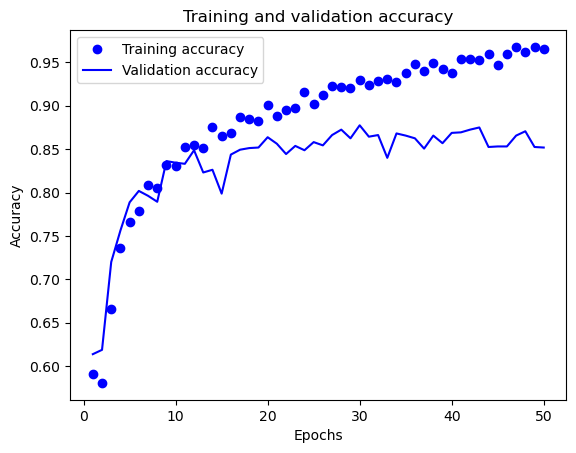

In [6]:
# Sonuçları çizdirelim
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [7]:
# Modeli kaydedelim
model.save('model_training_validation_100.h5')